In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import os as os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [3]:
GS = pd.read_csv("C:/Users/HP/Downloads/cubic_zirconia.csv")

In [4]:
GS.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
GS.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [6]:
GS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
GS.shape

(26967, 11)

In [8]:
GS.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [9]:
GS.drop_duplicates()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [10]:
GS.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
GS

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [12]:
GS.shape

(26967, 10)

In [13]:
GS.duplicated().sum()

34

In [14]:
GS.drop_duplicates(inplace=True)

In [15]:
GS.duplicated().sum()

0

In [16]:
GS.shape

(26933, 10)

In [17]:
GS.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933,26933,26933,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10805,5653,6565,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798010,NaN,NaN,NaN,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,NaN,NaN,NaN,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000


<AxesSubplot:>

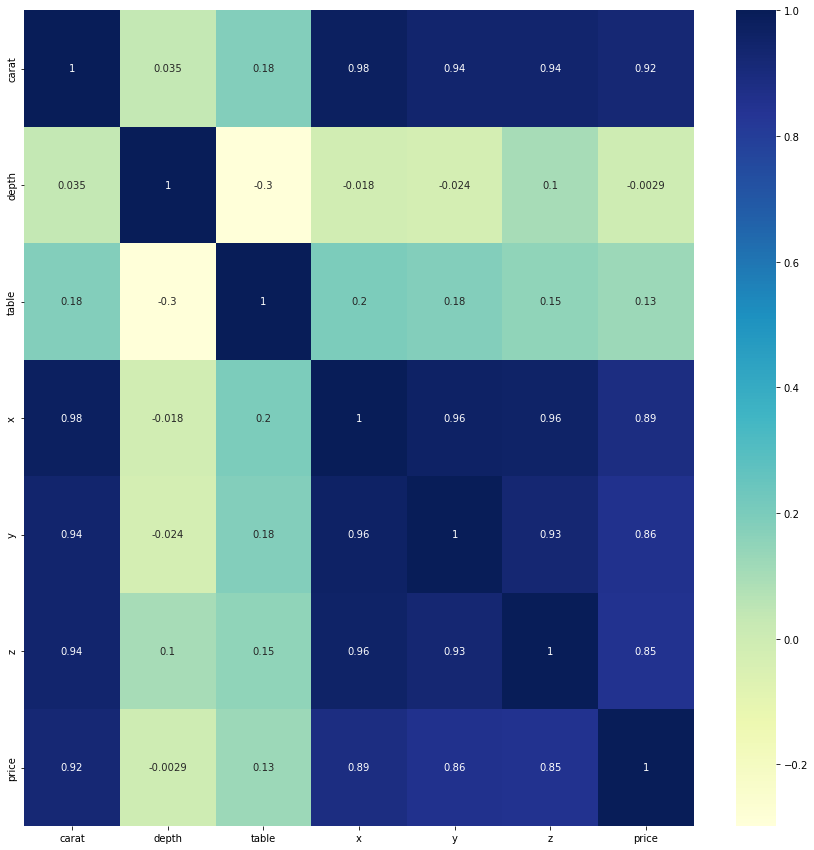

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(GS.corr(), cmap="YlGnBu", annot=True,ax=ax)

In [19]:
GS['cut'].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [20]:
GS['color'].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [21]:
GS['clarity'].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

Text(0.5, 0, 'cut')

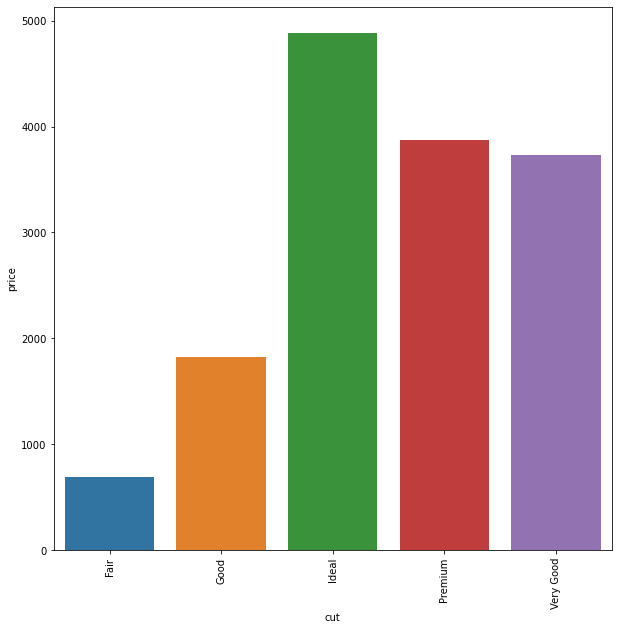

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
data = GS.groupby('cut')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.cut,y=data.price,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('cut')

In [23]:
GS = GS.replace({'Ideal':4,'Premium':3,'Very Good':2,'Good':1,'Fair':0})
GS

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,4,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,3,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,2,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [24]:
GS['cut'].value_counts()

4    10805
3     6886
2     6027
1     2435
0      780
Name: cut, dtype: int64

Text(0.5, 0, 'cut')

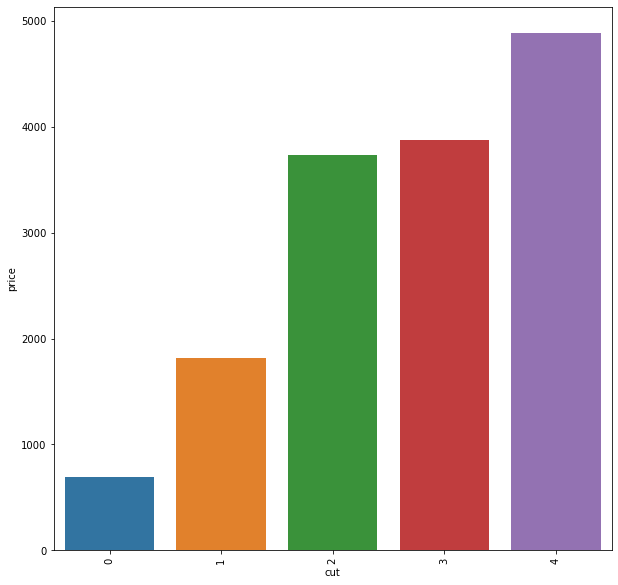

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
data = GS.groupby('cut')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.cut,y=data.price,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('cut')

In [26]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
def encode(GS,variable):
  GS[variable] = e.fit_transform(GS[variable])

In [27]:
encode(GS,'color')
encode(GS,'clarity')

Text(0.5, 0, 'color')

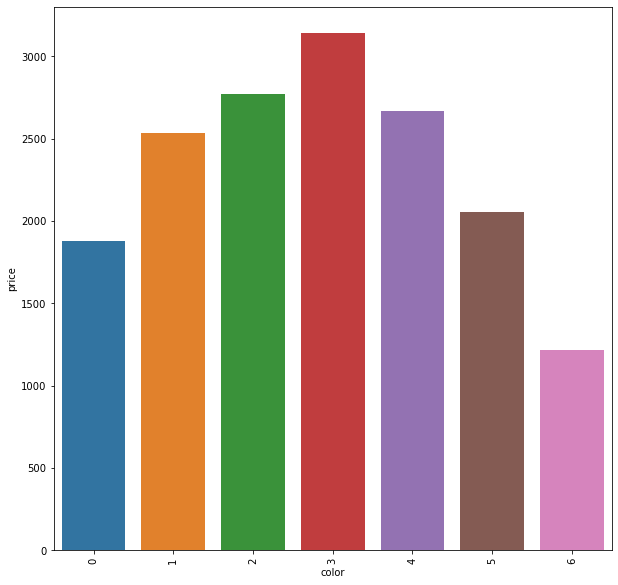

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
data = GS.groupby('color')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.color,y=data.price,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('color')

Text(0.5, 0, 'clarity')

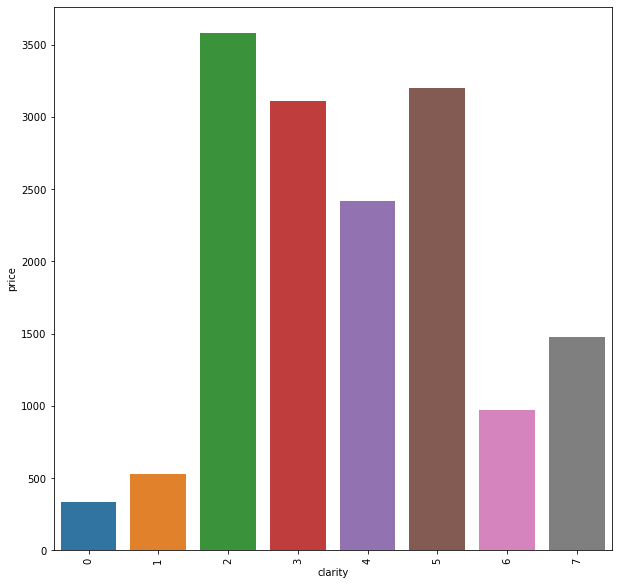

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
data = GS.groupby('clarity')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.clarity,y=data.price,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('clarity')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


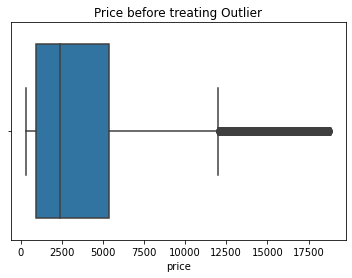

In [30]:
sns.boxplot(GS['price']).set_title("Price before treating Outlier");

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


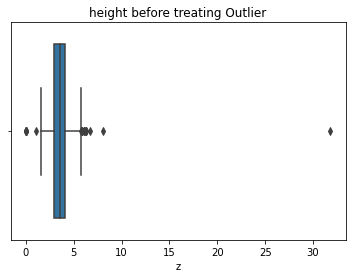

In [31]:
sns.boxplot(GS['z']).set_title("height before treating Outlier");

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


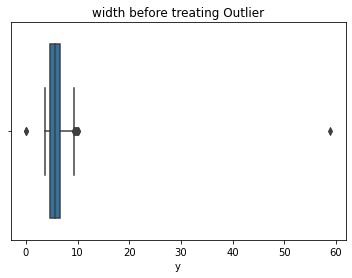

In [32]:
sns.boxplot(GS['y']).set_title("width before treating Outlier");

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


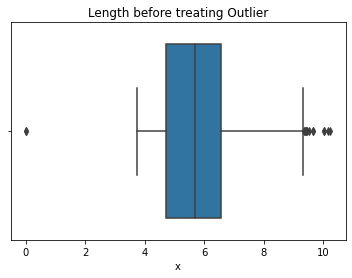

In [33]:
sns.boxplot(GS['x']).set_title("Length before treating Outlier");

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


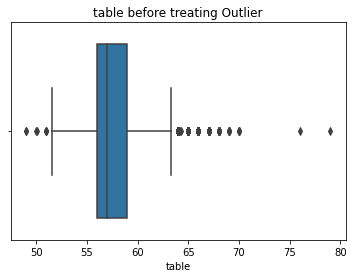

In [34]:
sns.boxplot(GS['table']).set_title("table before treating Outlier");

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


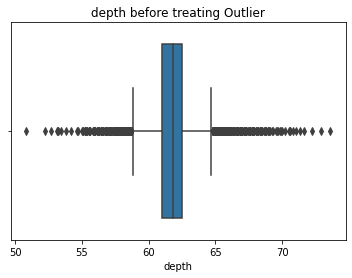

In [35]:
sns.boxplot(GS['depth']).set_title("depth before treating Outlier");

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


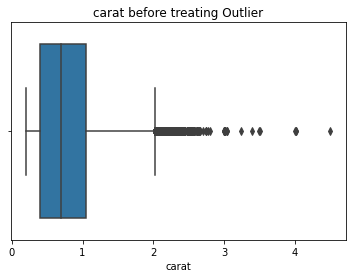

In [36]:
sns.boxplot(GS['carat']).set_title("carat before treating Outlier");

In [37]:
GS = GS.replace(0,np.nan)

In [38]:
GS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26153 non-null  float64
 2   color    23592 non-null  float64
 3   clarity  26569 non-null  float64
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26931 non-null  float64
 7   y        26931 non-null  float64
 8   z        26925 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


In [39]:
GS.isnull().sum()

carat         0
cut         780
color      3341
clarity     364
depth       697
table         0
x             2
y             2
z             8
price         0
dtype: int64

In [40]:
GS.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [41]:
GS['x'].fillna(GS['x'].mean(),inplace=True)

In [42]:
GS['y'].fillna(GS['y'].mean(),inplace=True)

In [43]:
GS['z'].fillna(GS['z'].mean(),inplace=True)


In [44]:
GS.isnull().sum()


carat         0
cut         780
color      3341
clarity     364
depth       697
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [45]:
GS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26153 non-null  float64
 2   color    23592 non-null  float64
 3   clarity  26569 non-null  float64
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


In [46]:
GS.describe()


,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26153.000000,23592.000000,26569.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,2.996482,2.974144,3.886861,61.745285,57.455950,5.729772,5.733528,3.538820,3937.526120
std,0.477237,1.007992,1.491590,1.677044,1.412243,2.232156,1.126285,1.163989,0.717377,4022.551862
min,0.200000,1.000000,1.000000,1.000000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,3.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,4.000000,4.000000,5.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,4.000000,6.000000,7.000000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [47]:
index = GS[(GS['z'] >= 5)|(GS['z'] <= 2)].index 
GS.drop(index, inplace=True) 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


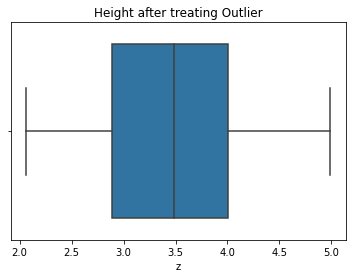

In [48]:
sns.boxplot(GS["z"]).set_title("Height after treating Outlier");

In [49]:
index = GS[(GS['y'] >= 7)|(GS['y'] <= 2)].index
GS.drop(index, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


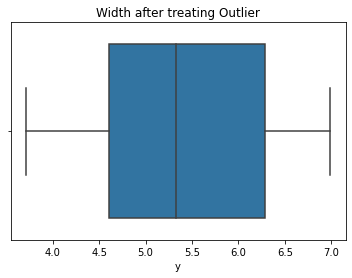

In [50]:
sns.boxplot(GS['y']).set_title("Width after treating Outlier");

In [51]:
index = GS[(GS['x'] >= 7) |(GS['x'] <= 4)].index
GS.drop(index, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


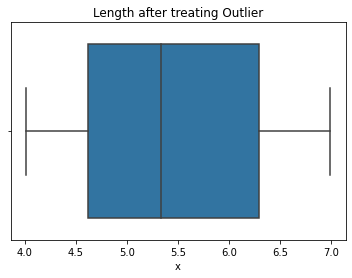

In [52]:
sns.boxplot(GS['x']).set_title("Length after treating Outlier");

In [53]:
index = GS[(GS['carat'] >= 1.5)].index
GS.drop(index, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


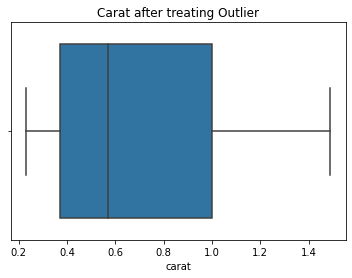

In [54]:
sns.boxplot(GS['carat']).set_title("Carat after treating Outlier");

In [55]:
index = GS[(GS['price'] >= 6500)].index
GS.drop(index, inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


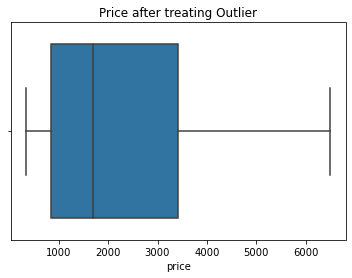

In [56]:
sns.boxplot(GS['price']).set_title("Price after treating Outlier");

In [57]:
GS.corr() 

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.177489,0.205129,-0.284922,0.071604,0.205736,0.988869,0.987076,0.988001,0.943422
cut,-0.177489,1.000000,-0.008547,0.103014,-0.130503,-0.456955,-0.158819,-0.164457,-0.177170,-0.133693
color,0.205129,-0.008547,1.000000,-0.022150,0.072434,-0.008011,0.185074,0.184737,0.192900,0.102179
clarity,-0.284922,0.103014,-0.022150,1.000000,-0.039762,-0.072517,-0.283752,-0.281900,-0.285294,-0.200241
depth,0.071604,-0.130503,0.072434,-0.039762,1.000000,-0.296540,0.000798,-0.003749,0.151140,0.041505
table,0.205736,-0.456955,-0.008011,-0.072517,-0.296540,1.000000,0.211724,0.203703,0.160766,0.168446
x,0.988869,-0.158819,0.185074,-0.283752,0.000798,0.211724,1.000000,0.997644,0.987442,0.928080
y,0.987076,-0.164457,0.184737,-0.281900,-0.003749,0.203703,0.997644,1.000000,0.986754,0.928730
z,0.988001,-0.177170,0.192900,-0.285294,0.151140,0.160766,0.987442,0.986754,1.000000,0.924613
price,0.943422,-0.133693,0.102179,-0.200241,0.041505,0.168446,0.928080,0.928730,0.924613,1.000000


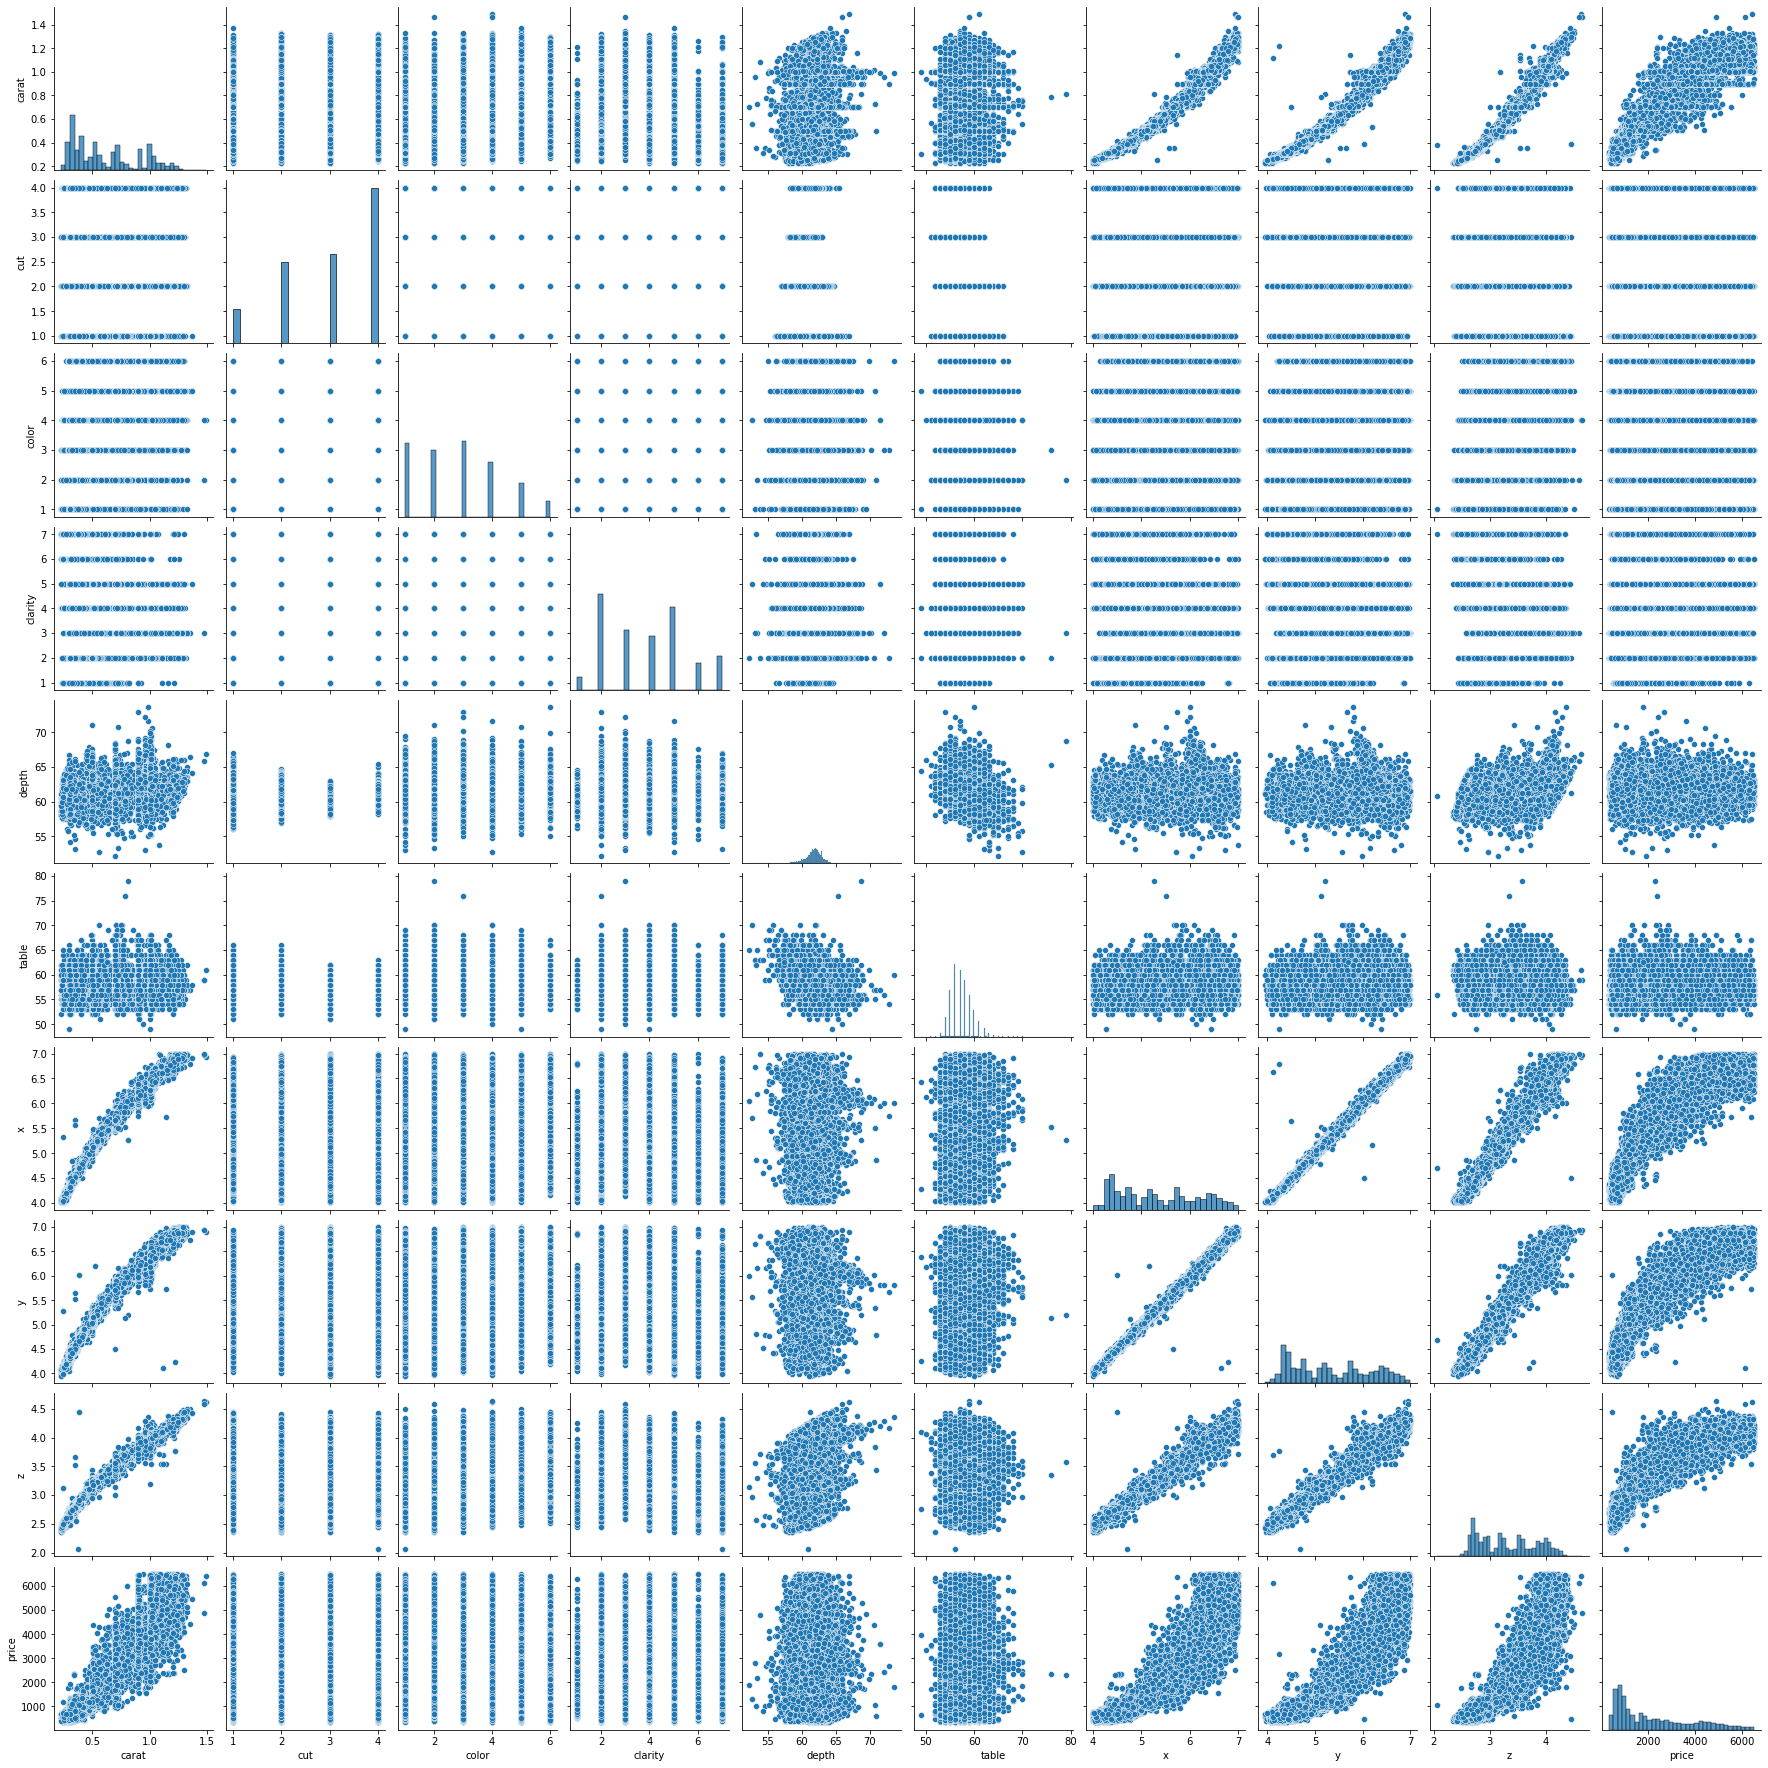

In [58]:
sns.pairplot(GS);

In [60]:
GS1 = pd.read_csv("C:/Users/HP/Downloads/cubic_zirconia.csv")
GS1

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [61]:
GS1.drop('Unnamed: 0',axis=1,inplace=True)

In [62]:
GS1.duplicated().sum()

34

In [63]:
GS1.drop_duplicates(inplace=True)

In [64]:
GS1.duplicated().sum()

0

In [65]:
GS1.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933,26933,26933,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10805,5653,6565,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798010,NaN,NaN,NaN,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,NaN,NaN,NaN,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000


In [66]:
GS1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [67]:
def impute_nan(df,variable,median):
    GS1[variable+"_median"]=GS1[variable].fillna(median)

In [68]:
impute_nan(GS1,'depth',GS1.depth.median())

In [69]:
GS1

,carat,cut,color,clarity,depth,table,x,y,z,price,depth_median
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,62.1
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,60.8
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,62.2
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,61.6
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,60.4
...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408,62.3
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114,61.9
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656,61.7
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682,61.8


In [70]:
GS1.drop('depth',axis=1,inplace=True)
GS1

,carat,cut,color,clarity,table,x,y,z,price,depth_median
0,0.30,Ideal,E,SI1,58.0,4.27,4.29,2.66,499,62.1
1,0.33,Premium,G,IF,58.0,4.42,4.46,2.70,984,60.8
2,0.90,Very Good,E,VVS2,60.0,6.04,6.12,3.78,6289,62.2
3,0.42,Ideal,F,VS1,56.0,4.82,4.80,2.96,1082,61.6
4,0.31,Ideal,F,VVS1,59.0,4.35,4.43,2.65,779,60.4
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,58.0,6.61,6.52,4.09,5408,62.3
26963,0.33,Ideal,H,IF,55.0,4.44,4.42,2.74,1114,61.9
26964,0.51,Premium,E,VS2,58.0,5.12,5.15,3.17,1656,61.7
26965,0.27,Very Good,F,VVS2,56.0,4.19,4.20,2.60,682,61.8


In [71]:
GS1.isnull().sum()

carat           0
cut             0
color           0
clarity         0
table           0
x               0
y               0
z               0
price           0
depth_median    0
dtype: int64

In [72]:
GS1.describe()

,carat,table,x,y,z,price,depth_median
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,57.455950,5.729346,5.733102,3.537769,3937.526120,61.746701
std,0.477237,2.232156,1.127367,1.165037,0.719964,4022.551862,1.393875
min,0.200000,49.000000,0.000000,0.000000,0.000000,326.000000,50.800000
25%,0.400000,56.000000,4.710000,4.710000,2.900000,945.000000,61.100000
50%,0.700000,57.000000,5.690000,5.700000,3.520000,2375.000000,61.800000
75%,1.050000,59.000000,6.550000,6.540000,4.040000,5356.000000,62.500000
max,4.500000,79.000000,10.230000,58.900000,31.800000,18818.000000,73.600000


In [73]:
GS1 = GS1[(GS1["x"] != 0) & (GS1["y"] != 0) & (GS1["z"] != 0)]

In [74]:
GS1.describe()

,carat,table,x,y,z,price,depth_median
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.797821,57.455305,5.729385,5.733152,3.538820,3936.249991,61.746982
std,0.477085,2.231327,1.126081,1.163820,0.717483,4020.983187,1.393457
min,0.200000,49.000000,3.730000,3.710000,1.070000,326.000000,50.800000
25%,0.400000,56.000000,4.710000,4.710000,2.900000,945.000000,61.100000
50%,0.700000,57.000000,5.690000,5.700000,3.520000,2373.000000,61.800000
75%,1.050000,59.000000,6.550000,6.540000,4.040000,5353.000000,62.500000
max,4.500000,79.000000,10.230000,58.900000,31.800000,18818.000000,73.600000


In [75]:
GS1.corr() 

,carat,table,x,y,z,price,depth_median
carat,1.000000,0.181511,0.977908,0.942378,0.946774,0.922400,0.035101
table,0.181511,1.000000,0.197517,0.183545,0.151034,0.126967,-0.293356
x,0.977908,0.197517,1.000000,0.962510,0.961010,0.887467,-0.018184
y,0.942378,0.183545,0.962510,1.000000,0.932974,0.857255,-0.024196
z,0.946774,0.151034,0.961010,0.932974,1.000000,0.855775,0.097134
price,0.922400,0.126967,0.887467,0.857255,0.855775,1.000000,-0.002683
depth_median,0.035101,-0.293356,-0.018184,-0.024196,0.097134,-0.002683,1.000000


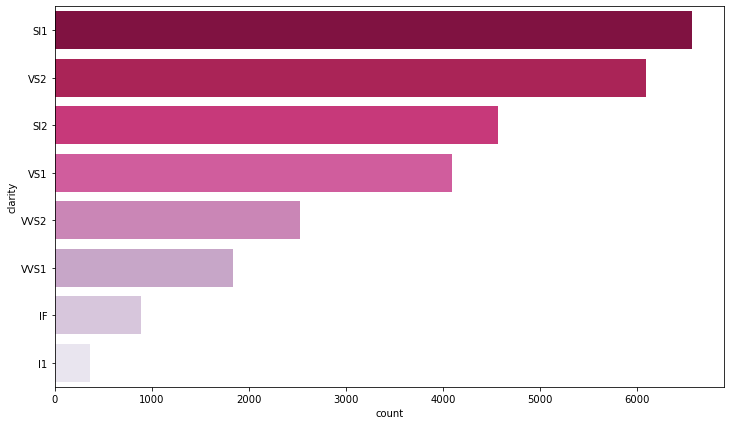

In [76]:
plt.figure(figsize=(12,7))
sns.countplot(y=(GS1.clarity),palette='PuRd_r', order=GS1.clarity.value_counts().index);

In [77]:
GS1['price'].agg({'mean','median','std'})

median    2373.000000
std       4020.983187
mean      3936.249991
Name: price, dtype: float64

In [78]:
GS1.groupby('cut')['price'].agg({'mean','median','std','max','min'})

,median,max,std,mean,min
cut,,,,,
Fair,3337.0,18574,3747.642431,4565.768935,369
Good,3092.5,18707,3621.757943,3927.074774,335
Ideal,1762.0,18804,3869.198651,3454.820639,326
Premium,3108.0,18795,4315.682923,4540.186192,326
Very Good,2633.0,18818,4016.865952,4032.267961,336


In [96]:
GS1 = GS1.replace({'Ideal':1,'Premium':4,'Very Good':3,'Good':2,'Fair':5})
GS1

,carat,cut,color,clarity,table,price,depth_median
0,0.30,1,1,2,58.0,499,62.1
1,0.33,4,3,1,58.0,984,60.8
2,0.90,3,1,7,60.0,6289,62.2
3,0.42,1,2,4,56.0,1082,61.6
4,0.31,1,2,6,59.0,779,60.4
...,...,...,...,...,...,...,...
26962,1.11,4,3,2,58.0,5408,62.3
26963,0.33,1,4,1,55.0,1114,61.9
26964,0.51,4,1,5,58.0,1656,61.7
26965,0.27,3,2,7,56.0,682,61.8


In [97]:
GS1.groupby('color')['price'].agg({'mean','median','std'})

,median,std,mean
color,,,
0,1799.0,3419.875831,3184.827597
1,1698.0,3397.600817,3073.940399
2,2282.0,3808.268388,3700.277001
3,2273.5,4058.409813,4004.967434
4,3394.0,4239.831570,4469.778049
5,3733.0,4728.462914,5124.816637
6,4234.5,4488.011962,5329.706250


In [98]:
GS1['cut'].value_counts()

1    10805
4     6880
3     6027
2     2434
5      779
Name: cut, dtype: int64

Text(0.5, 0, 'cut')

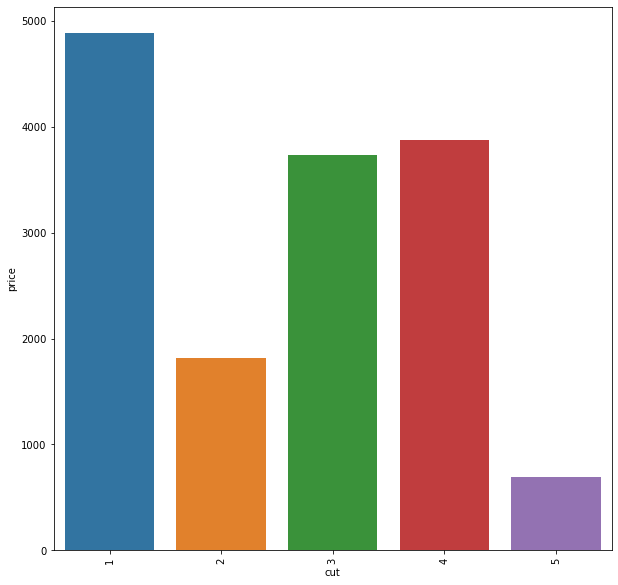

In [99]:
fig, ax = plt.subplots(figsize=(10,10))
data = GS1.groupby('cut')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.cut,y=data.price,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('cut')

In [100]:
e = LabelEncoder()
def encode(GS1,variable):
  GS1[variable] = e.fit_transform(GS1[variable])

In [101]:
encode(GS1,'color')
encode(GS1,'clarity')

Text(0.5, 0, 'color')

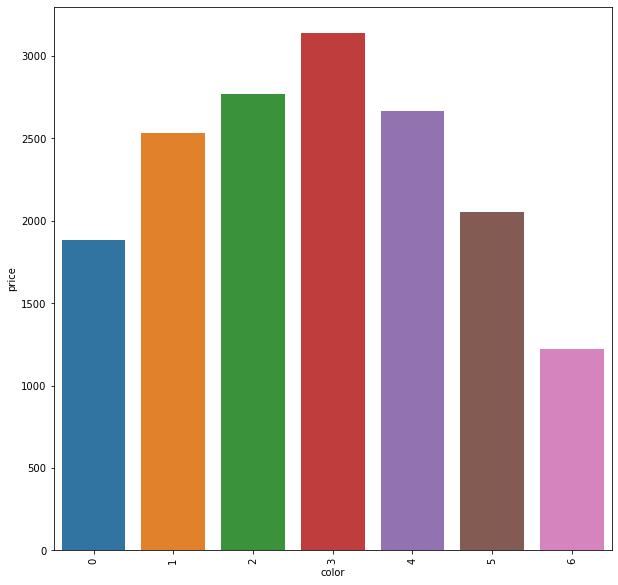

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
data = GS1.groupby('color')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.color,y=data.price,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('color')

Text(0.5, 0, 'clarity')

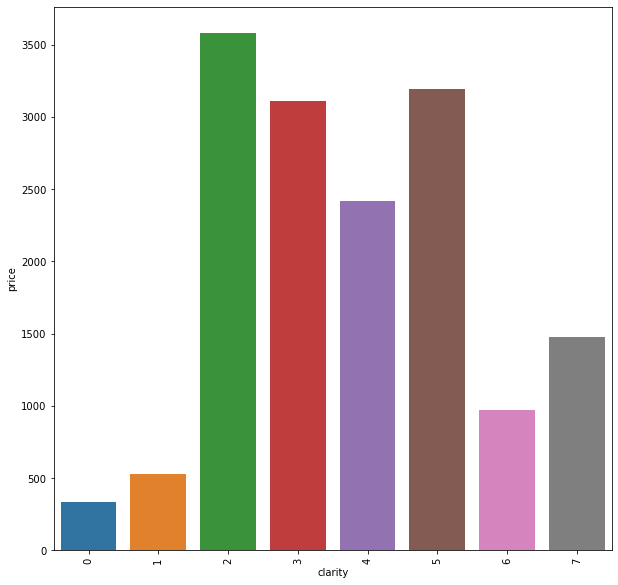

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
data = GS1.groupby('clarity')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.clarity,y=data.price,ax=ax)
plt.xticks(rotation=90)
plt.xlabel('clarity')

In [104]:
GS1

,carat,cut,color,clarity,table,price,depth_median
0,0.30,1,1,2,58.0,499,62.1
1,0.33,4,3,1,58.0,984,60.8
2,0.90,3,1,7,60.0,6289,62.2
3,0.42,1,2,4,56.0,1082,61.6
4,0.31,1,2,6,59.0,779,60.4
...,...,...,...,...,...,...,...
26962,1.11,4,3,2,58.0,5408,62.3
26963,0.33,1,4,1,55.0,1114,61.9
26964,0.51,4,1,5,58.0,1656,61.7
26965,0.27,3,2,7,56.0,682,61.8


In [107]:
GS1.drop('depth_median',axis=1,inplace=True)

In [108]:
GS1

,carat,cut,color,clarity,table,price
0,0.30,1,1,2,58.0,499
1,0.33,4,3,1,58.0,984
2,0.90,3,1,7,60.0,6289
3,0.42,1,2,4,56.0,1082
4,0.31,1,2,6,59.0,779
...,...,...,...,...,...,...
26962,1.11,4,3,2,58.0,5408
26963,0.33,1,4,1,55.0,1114
26964,0.51,4,1,5,58.0,1656
26965,0.27,3,2,7,56.0,682


<AxesSubplot:>

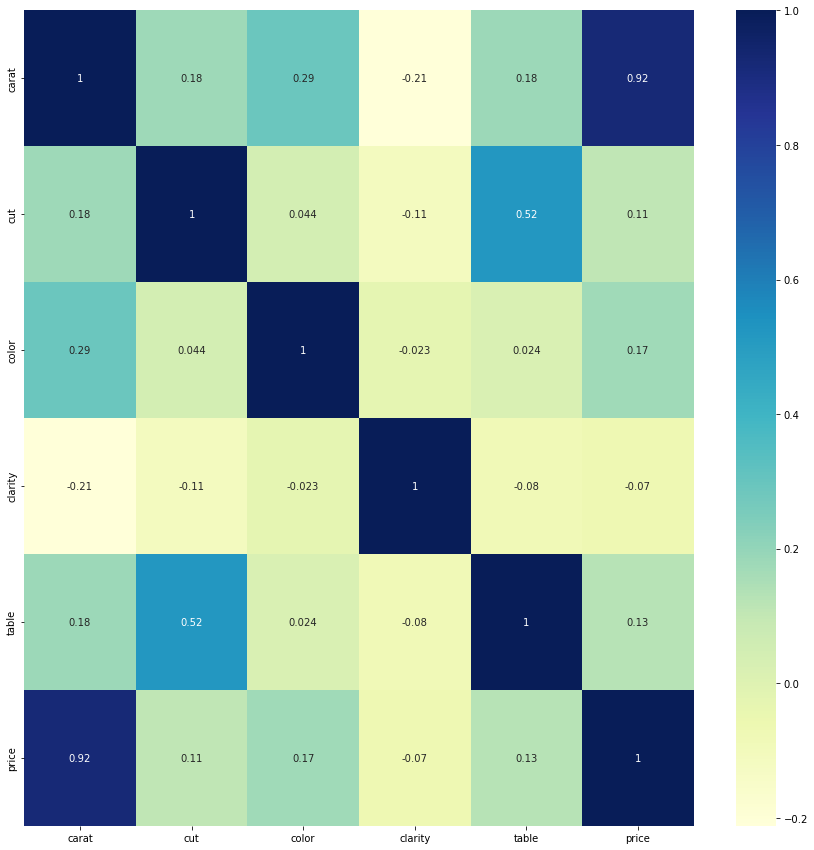

In [109]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(GS1.corr(), cmap="YlGnBu", annot=True,ax=ax)

In [110]:
X= GS1.drop('price',axis=1)
X=X.drop({'cut','color','clarity'},axis=1)
y=GS1[['price']]

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [113]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [114]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 7845.166356463338
The coefficient for table is -79.21668483759552


In [115]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2223.455153459595


In [116]:
regression_model.score(X_train, y_train)

0.8511663143667033

In [117]:
regression_model.score(X_test, y_test)

0.8555716077858136

In [118]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,table,price
5030,1.10,56.0,4065
12108,1.01,56.0,5166
20181,0.67,61.4,1708
4712,0.76,63.0,2447
2548,1.01,59.0,6618


In [121]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+table+price', data = data_train).fit()
lm1.params

Intercept    4.547474e-13
carat        2.756906e-12
table       -3.197442e-14
price        1.000000e+00
dtype: float64

In [122]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.215e+35
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:08:24   Log-Likelihood:             4.9577e+05
No. Observations:               18847   AIC:                        -9.915e+05
Df Residuals:                   18843   BIC:                        -9.915e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.547e-13   1.72e-13      2.639      0.0